In [56]:
# import normal work libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# import KMeans clustering libraries
from sklearn.cluster import KMeans

# import DBScan clustering libraries
from sklearn.cluster import DBSCAN


In [2]:
# Read input file
df_crime = pd.read_csv('crime_data.csv')
df_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
print('Shape: ', df_crime.shape)

Shape:  (50, 5)


In [4]:
df_crime[df_crime.isnull()].count()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
df_crime[df_crime.duplicated()].count()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df_crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

Observation: All four fields are numeric continuous variables. Only state name is string object.

No null values exist.

No duplicates exist.

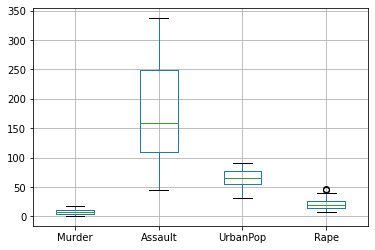

In [7]:
df_crime.boxplot()

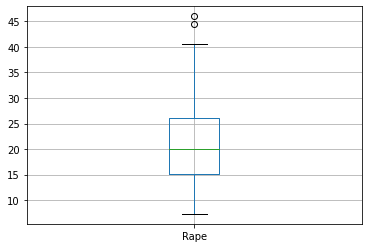

In [8]:
df_crime.boxplot(column='Rape')

**Normalization**

Observation: No outliers exist. For Rape column also, outliers are not too far from uppper whisker. 

In [9]:
# Normalization function
def norm_func (i):
  x = (i - i.min())/(i.max() - i.min())
  return (x)

In [10]:
# Normalized Dataframe (Considering only numerical part of the data)
df_crime_norm = norm_func(df_crime.iloc[:,1:])

In [11]:
df_crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


##**Hierarchical Clustering**

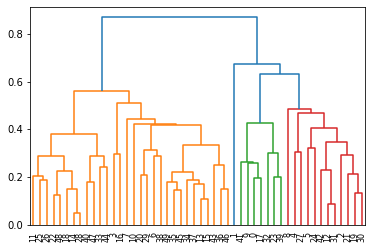

In [12]:
# Create a dendogram
dendogram = sch.dendrogram(sch.linkage(df_crime_norm, method='average'))

Observation: By looking at above Dendogram, we can divide the given data into 3 or 4 clusters clearly.

In [13]:
# Create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average").fit(df_crime_norm)
hc

AgglomerativeClustering(linkage='average', n_clusters=4)

In [14]:
hc.labels_

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0])

In [15]:
df_crime['Cluster'] = hc.labels_
df_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [16]:
df_crime['Cluster'].value_counts()

0    30
1    12
3     7
2     1
Name: Cluster, dtype: int64

In [17]:
df_crime['Cluster'].unique()

array([3, 2, 1, 0])

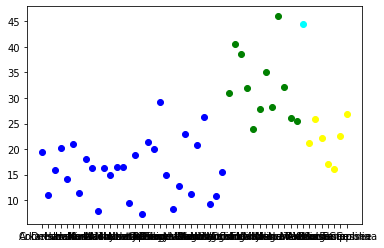

In [18]:
color = ['blue', 'green', 'cyan', 'yellow']
for i in range(0,4):
  data=df_crime[df_crime['Cluster']==i]
  plt.scatter(data['Unnamed: 0'], data['Rape'], c=color[i])
plt.show()

##  **KMeans Clustering**

In [19]:
# Find the optimal number of K
# The KMeans algorithm aims to choose centeroids that minimize the inertia, or within cluster sum of squares criteria

In [20]:
wcss= []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=123)
  kmeans.fit(df_crime_norm)
  wcss.append(kmeans.inertia_) # This is nothing but wss

In [21]:
wcss

[13.184122550256445,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.1850219324724334,
 2.9222738617403357,
 2.539649153417607,
 2.3656587351867224,
 2.020926734726901,
 1.875348378805648]

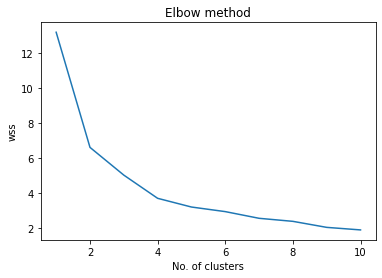

In [22]:
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wss')
plt.show()

Observation: Dividing data into four clusters gives best results.

In [23]:
kmeans_final = KMeans(n_clusters=4, random_state=442)
kmeans_final.fit(df_crime_norm)

KMeans(n_clusters=4, random_state=442)

In [24]:
kmeans_final.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [25]:
df_crime['KMeans_Cluster'] = kmeans_final.labels_

In [26]:
df_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster,KMeans_Cluster
0,Alabama,13.2,236,58,21.2,3,1
1,Alaska,10.0,263,48,44.5,2,2
2,Arizona,8.1,294,80,31.0,1,2
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,2


In [27]:
df_crime['KMeans_Cluster'].value_counts()

0    17
3    13
2    12
1     8
Name: KMeans_Cluster, dtype: int64

In [28]:
# Centroids of KMeans Clustering
Centroids = df_crime.groupby(['KMeans_Cluster']).mean()
Centroids

,Murder,Assault,UrbanPop,Rape,Cluster
KMeans_Cluster,,,,,
0,5.852941,141.176471,73.647059,19.335294,0.058824
1,13.937500,243.625000,53.750000,21.412500,2.625000
2,10.966667,264.000000,76.500000,33.608333,1.083333
3,3.600000,78.538462,52.076923,12.176923,0.000000


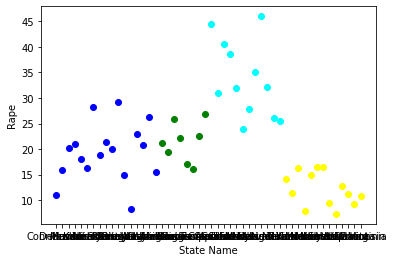

In [29]:
color = ['blue', 'green', 'cyan', 'yellow']
for i in range(0,4):
  data=df_crime[df_crime['KMeans_Cluster']==i]
  plt.scatter(data['Unnamed: 0'], data['Rape'], c=color[i])
plt.xlabel('State Name')
plt.ylabel('Rape')
#plt.plot(Centroids['Rape'], c='red' )
plt.show()

## **DBScan Clustering**

In [31]:
dbscan = DBSCAN(eps=3, min_samples= 6)
dbscan.fit(df_crime_norm)
# Noisy samples are given the label -1
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [32]:
df_crime['DB_Cluster'] = dbscan.labels_
df_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster,KMeans_Cluster,DB_Cluster
0,Alabama,13.2,236,58,21.2,3,1,0
1,Alaska,10.0,263,48,44.5,2,2,0
2,Arizona,8.1,294,80,31.0,1,2,0
3,Arkansas,8.8,190,50,19.5,0,1,0
4,California,9.0,276,91,40.6,1,2,0


In [34]:
# Noisy data or outliers
df_crime[df_crime['DB_Cluster'] == -1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster,KMeans_Cluster,DB_Cluster


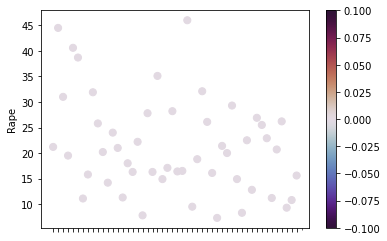

In [42]:
df_crime.plot(x='Unnamed: 0', y='Rape', kind='scatter', s=50, c=df_crime['DB_Cluster'], cmap=plt.cm.twilight_shifted)

Final Conclusion: 

This crime data can be best divided into three or four clusters. DBScan indicating that no row outliers exists in the data. 
KMeans Clustering is giving best results when you plot a chart between State and Rape columns. 